In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [2]:
fandango=pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


<Axes: xlabel='RATING', ylabel='VOTES'>

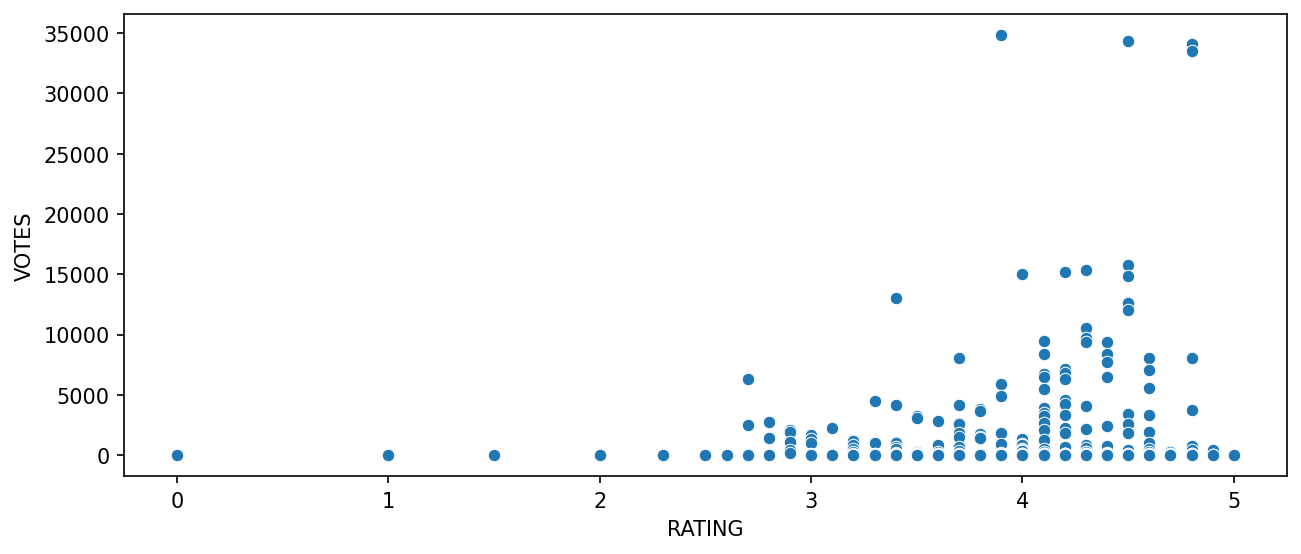

In [4]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, y='VOTES', x='RATING')

In [5]:
title='Film Title Name (Year)'

In [6]:
title.split('(')[-1].replace(')','')

'Year'

In [7]:
fandango['YEAR']=fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [8]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [9]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
1         7
2016      1
1964      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

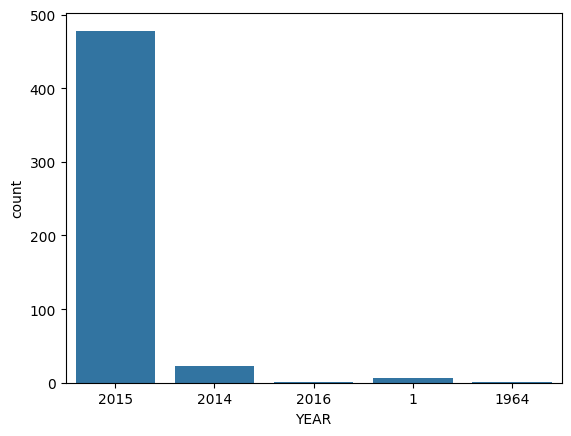

In [10]:
sns.countplot(data=fandango, x='YEAR')

In [11]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [12]:
no_votes=fandango['VOTES']==0

In [13]:
no_votes.sum()

np.int64(73)

In [14]:
len(fandango[fandango['VOTES']==0])

73

In [15]:
fan_rev=fandango[fandango['VOTES']>0]
fan_rev

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015
433,The Intern (2015),5.0,5.0,1,2015
434,The Park Bench (2015),5.0,5.0,1,2015
435,The Wanted 18 (2015),5.0,5.0,1,2015


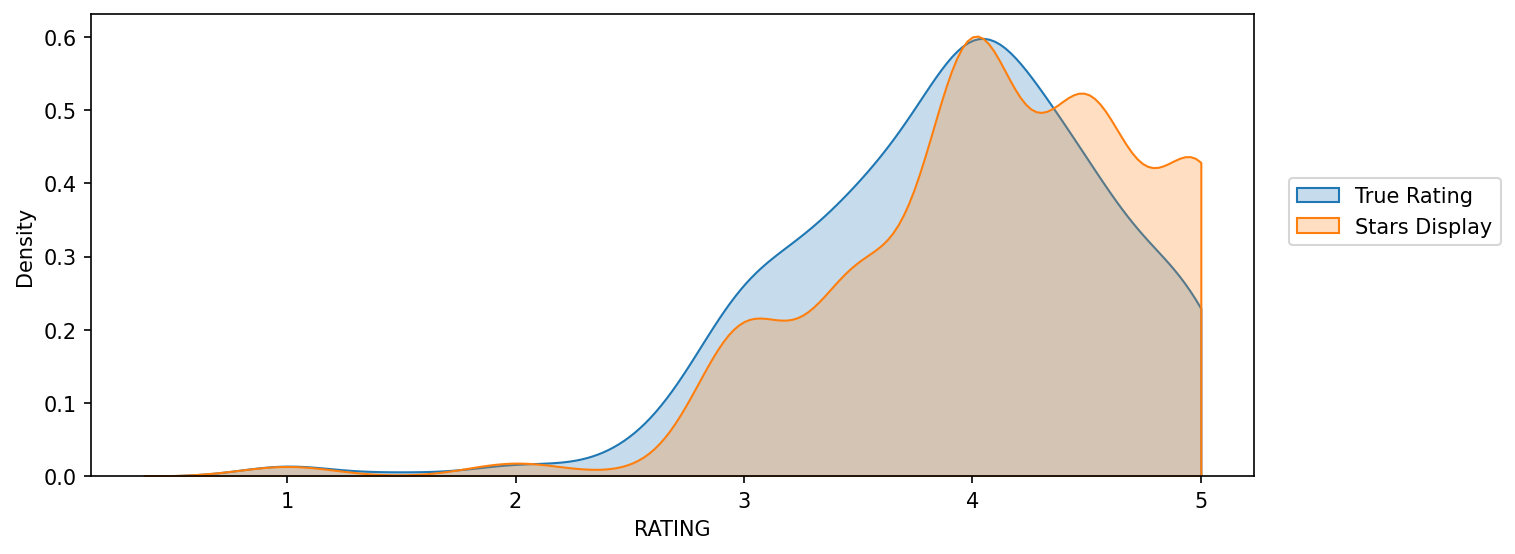

In [16]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_rev, x='RATING', clip=[0,5], fill=True, label='True Rating')
sns.kdeplot(data=fan_rev, x='STARS', clip=[0,5], fill=True, label='Stars Display')
plt.legend(loc=(1.03,0.5))

In [17]:
fan_rev['STARR_DIFF']=fan_rev['STARS']-fan_rev['RATING']

C:\Users\ay\AppData\Local\Temp\ipykernel_4624\3709146419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_rev['STARR_DIFF']=fan_rev['STARS']-fan_rev['RATING']


In [18]:
fan_rev.head()

,FILM,STARS,RATING,VOTES,YEAR,STARR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


In [19]:
fan_rev['STARR_DIFF']= round(fan_rev['STARR_DIFF'],2)

C:\Users\ay\AppData\Local\Temp\ipykernel_4624\802702532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_rev['STARR_DIFF']= round(fan_rev['STARR_DIFF'],2)


In [20]:
fan_rev.head()

,FILM,STARS,RATING,VOTES,YEAR,STARR_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARR_DIFF', ylabel='count'>

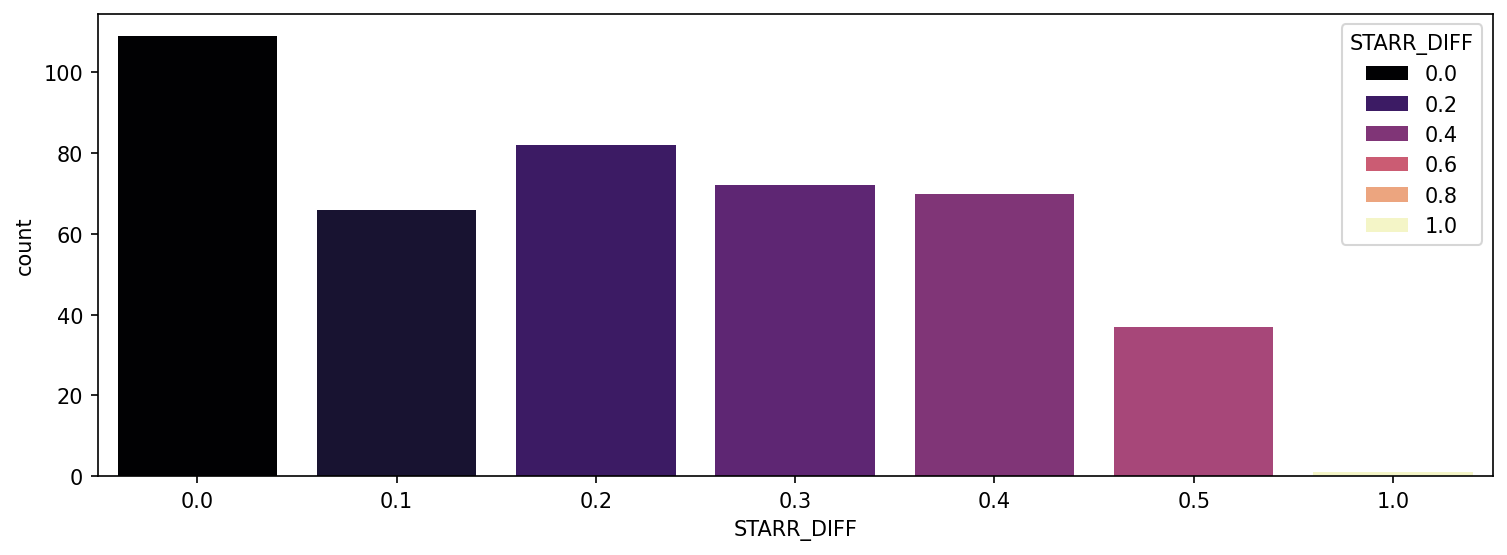

In [21]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_rev, x='STARR_DIFF', hue='STARR_DIFF', palette='magma')

In [22]:
fan_rev[fan_rev['STARR_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARR_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [23]:
all_sites=pd.read_csv("fandango_score_comparison.csv")

In [24]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [25]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [26]:
all_sites.drop(columns=['Fandango_Stars','Fandango_votes','Fandango_Difference'],inplace=True)

In [27]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,4.5,3.70,4.30,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,4.5,4.25,4.00,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,4.5,4.00,4.50,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,4.5,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.0,0.70,1.40,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367
142,'71 (2015),97,82,83,7.5,7.2,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955


In [28]:
all_sites.drop(columns='Fandango_Ratingvalue', inplace=True)

In [29]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560


(0.0, 100.0)

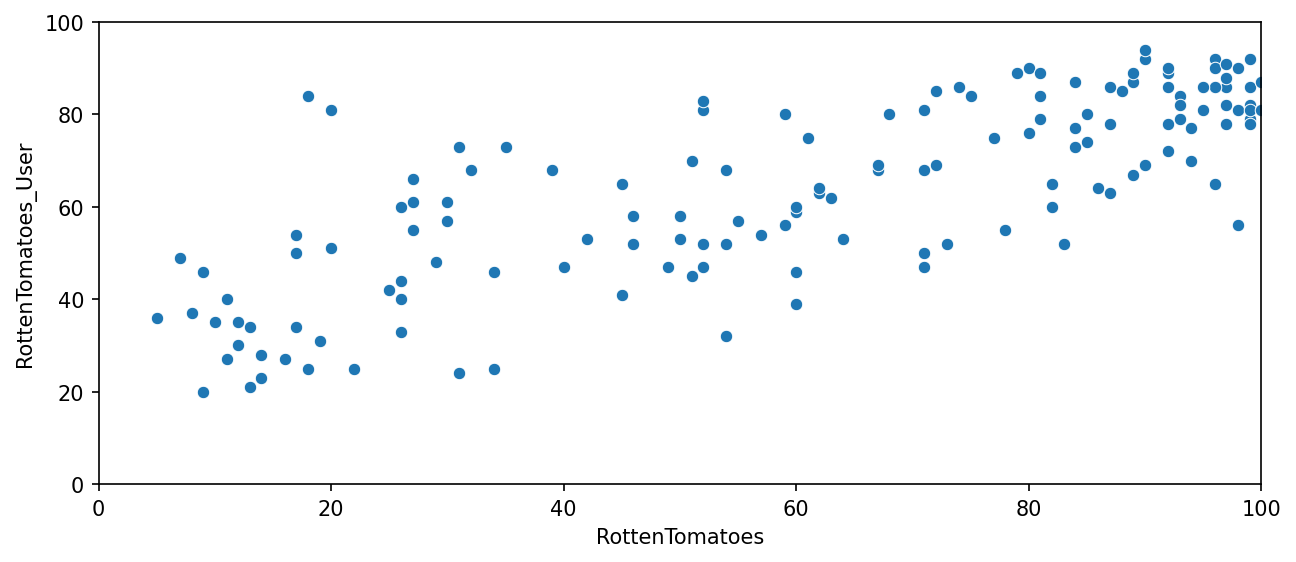

In [46]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [47]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [48]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,-14


In [49]:
all_sites['Rotten_Diff'].apply(abs).mean()

np.float64(15.095890410958905)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

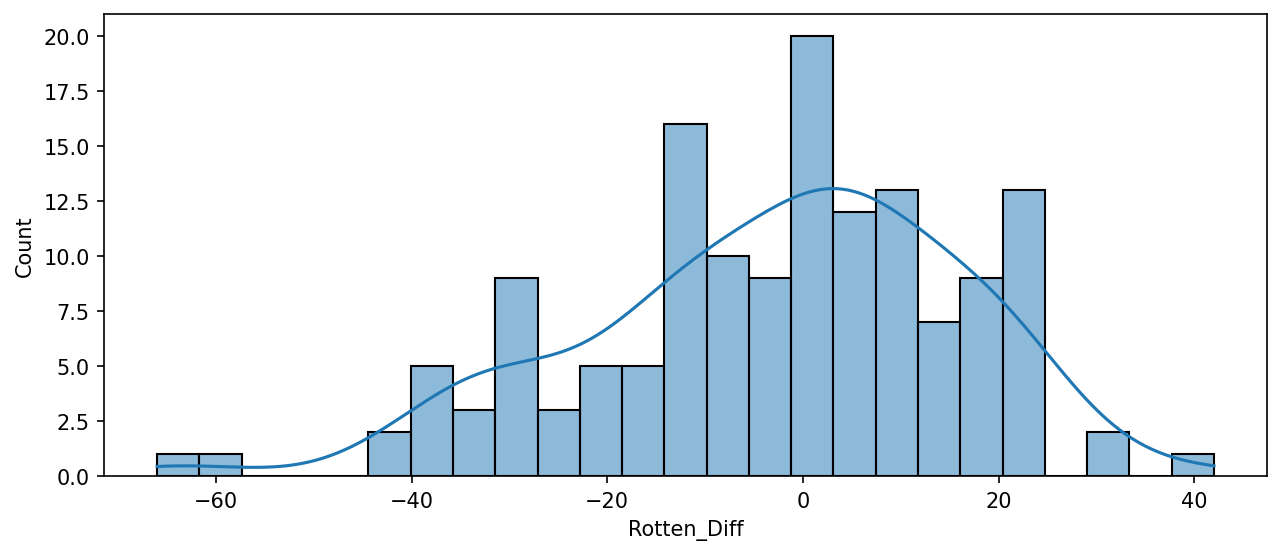

In [50]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True)

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

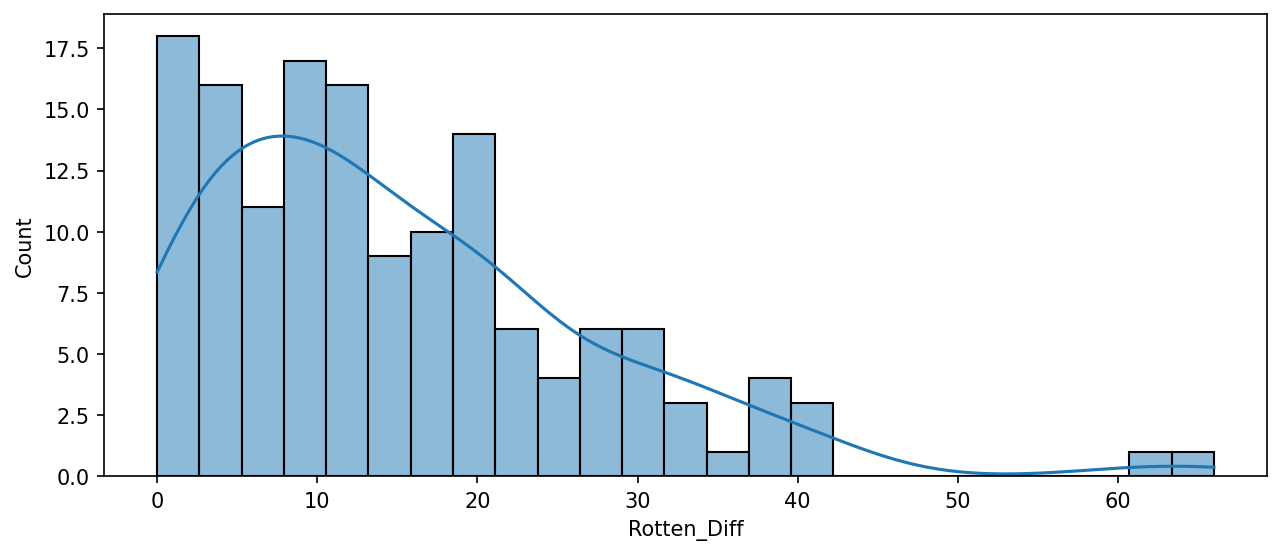

In [51]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)

In [52]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,-14


In [53]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.20,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,1.00,4.05,1.50,2.95,3.70,1.0,4.0,1.5,3.0,3.5,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,0.35,2.45,1.40,1.65,2.95,0.5,2.5,1.5,1.5,3.0,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,1.55,3.65,1.65,2.40,3.60,1.5,3.5,1.5,2.5,3.5,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,1.35,3.30,1.75,1.65,3.35,1.5,3.5,2.0,1.5,3.5,126,37292,-39


In [54]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM'],

(3         Do You Believe? (2015)
 85             Little Boy (2015)
 105      Hitman: Agent 47 (2015)
 134      The Longest Ride (2015)
 125    The Wedding Ringer (2015)
 Name: FILM, dtype: object,)

In [55]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,-14


<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

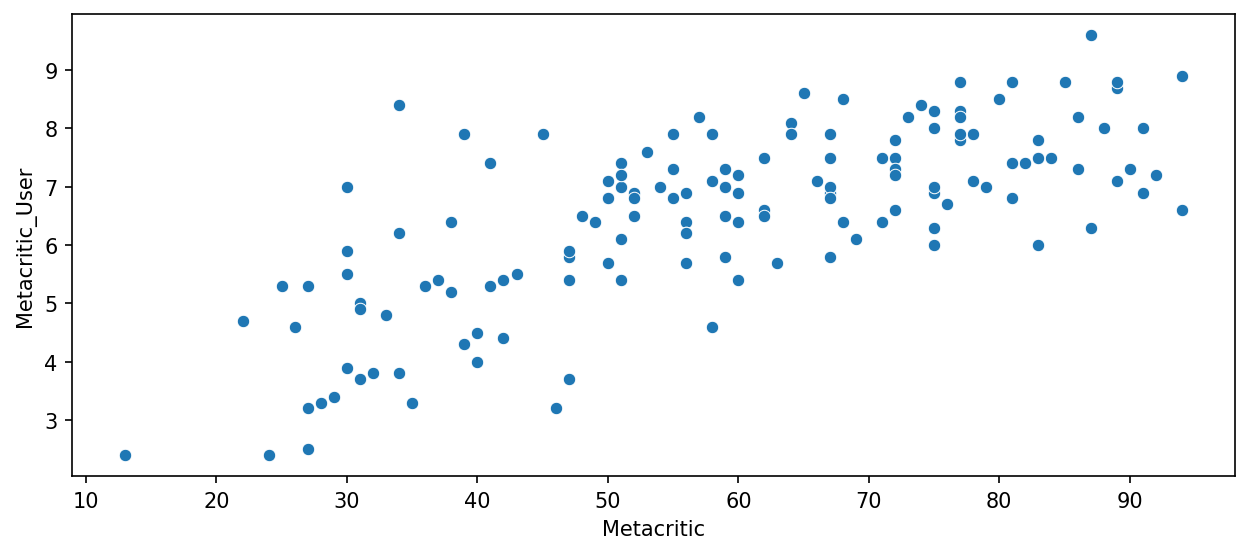

In [56]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic',y='Metacritic_User')

In [57]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,-14


<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

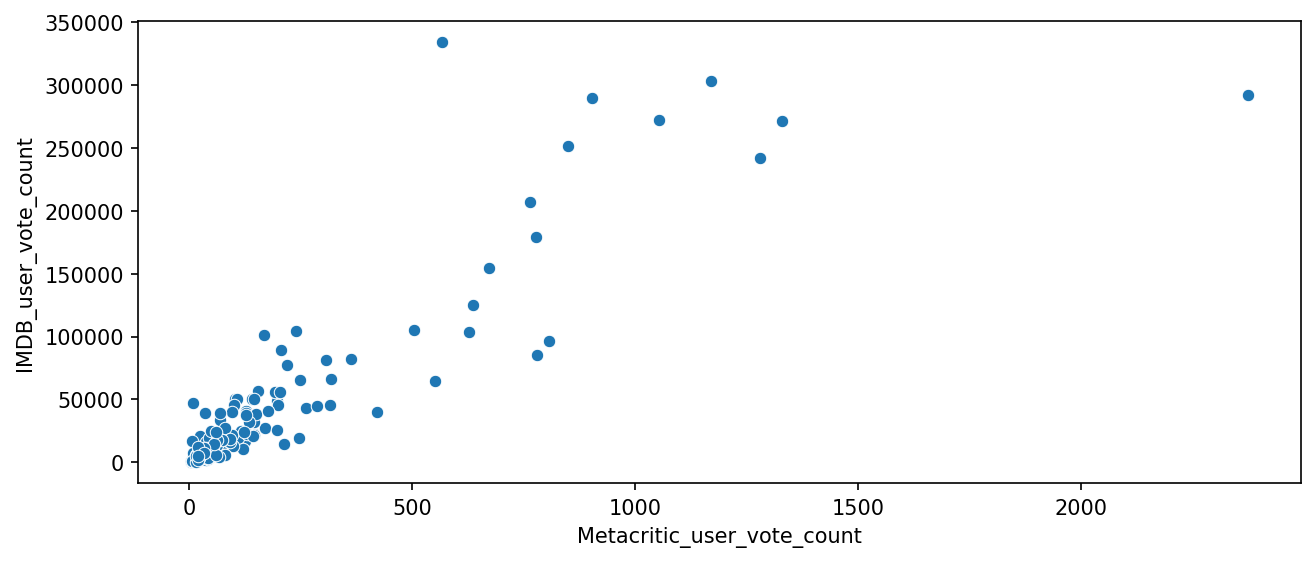

In [58]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, y='IMDB_user_vote_count',x='Metacritic_user_vote_count')

In [59]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,4.5,4.6,3.65,4.1,4.05,4.5,4.5,3.5,4.0,4.0,566,334164,-2


In [60]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.85,4.4,4.45,4.35,4.15,5.0,4.5,4.5,4.5,4.0,2375,292023,9


# Comparison

In [61]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,-14


In [62]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
 4   YEAR    510 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 20.1+ KB


In [64]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   RT_norm                     146 non-null    float64
 7   RT_user_norm                146 non-null    float64
 8   Metacritic_norm             146 non-null    float64
 9   Metacritic_user_nom         146 non-null    float64
 10  IMDB_norm                   146 non-null    float64
 11  RT_norm_round               146 non-null    float64
 12  RT_user_norm_round          146 non-null    float64
 13  Metacritic_norm_round       146 non

In [65]:
df=pd.merge(fandango,all_sites, on='FILM', how='inner')

In [66]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,1.60,2.10,1.5,2.0,2.5,1.5,2.0,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,3.50,3.65,3.5,4.0,3.0,3.5,3.5,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,3.30,3.70,3.5,4.5,3.5,3.5,3.5,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,3.40,3.70,4.0,4.0,3.5,3.5,3.5,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,4.45,4.30,5.0,4.5,4.5,4.5,4.5,807,96252,8


In [68]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
RT_norm                            5.0
RT_user_norm                       4.7
Metacritic_norm                    4.7
Metacritic_user_nom                4.8
IMDB_norm                          4.3
RT_norm_round                      5.0
RT_user_norm_round                 4.5
Metacritic_norm_round              4.5
Metacritic_user_norm_round         5.0
IMDB_norm_round                    4.5
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [70]:
df['RT_Norm']=np.round(df['RottenTomatoes']/20,1)
df['RT_Users_Norm']=np.round(df['RottenTomatoes']/20,1)

In [71]:
df['Meta_Norm']=np.round(df['Metacritic']/20,1)
df['Meta_Users_Norm']=np.round(df['Metacritic_User']/2,1)

In [72]:
df['IMDB_Norm']=np.round(df['IMDB']/2,1)

In [73]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RT_Users_Norm,Meta_Norm,Meta_Users_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,1.5,2.0,778,179506,-17,1.2,1.2,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,3.5,3.5,1281,241807,-10,3.6,3.6,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,3.5,3.5,850,251856,-13,3.6,3.6,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,3.5,3.5,764,207211,-3,4.0,4.0,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,4.5,4.5,807,96252,8,4.9,4.9,4.7,4.4,4.3


In [74]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Rotten_Diff', 'RT_Norm', 'RT_Users_Norm', 'Meta_Norm',
       'Meta_Users_Norm', 'IMDB_Norm'],
      dtype='object')

In [77]:
norms_scores=df[['STARS', 'RATING','RT_Norm', 'RT_Users_Norm', 'Meta_Norm','Meta_Users_Norm', 'IMDB_Norm']]

In [78]:
norms_scores.head()

,STARS,RATING,RT_Norm,RT_Users_Norm,Meta_Norm,Meta_Users_Norm,IMDB_Norm
0,4.0,3.9,1.2,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.9,4.7,4.4,4.3


<Axes: ylabel='Density'>

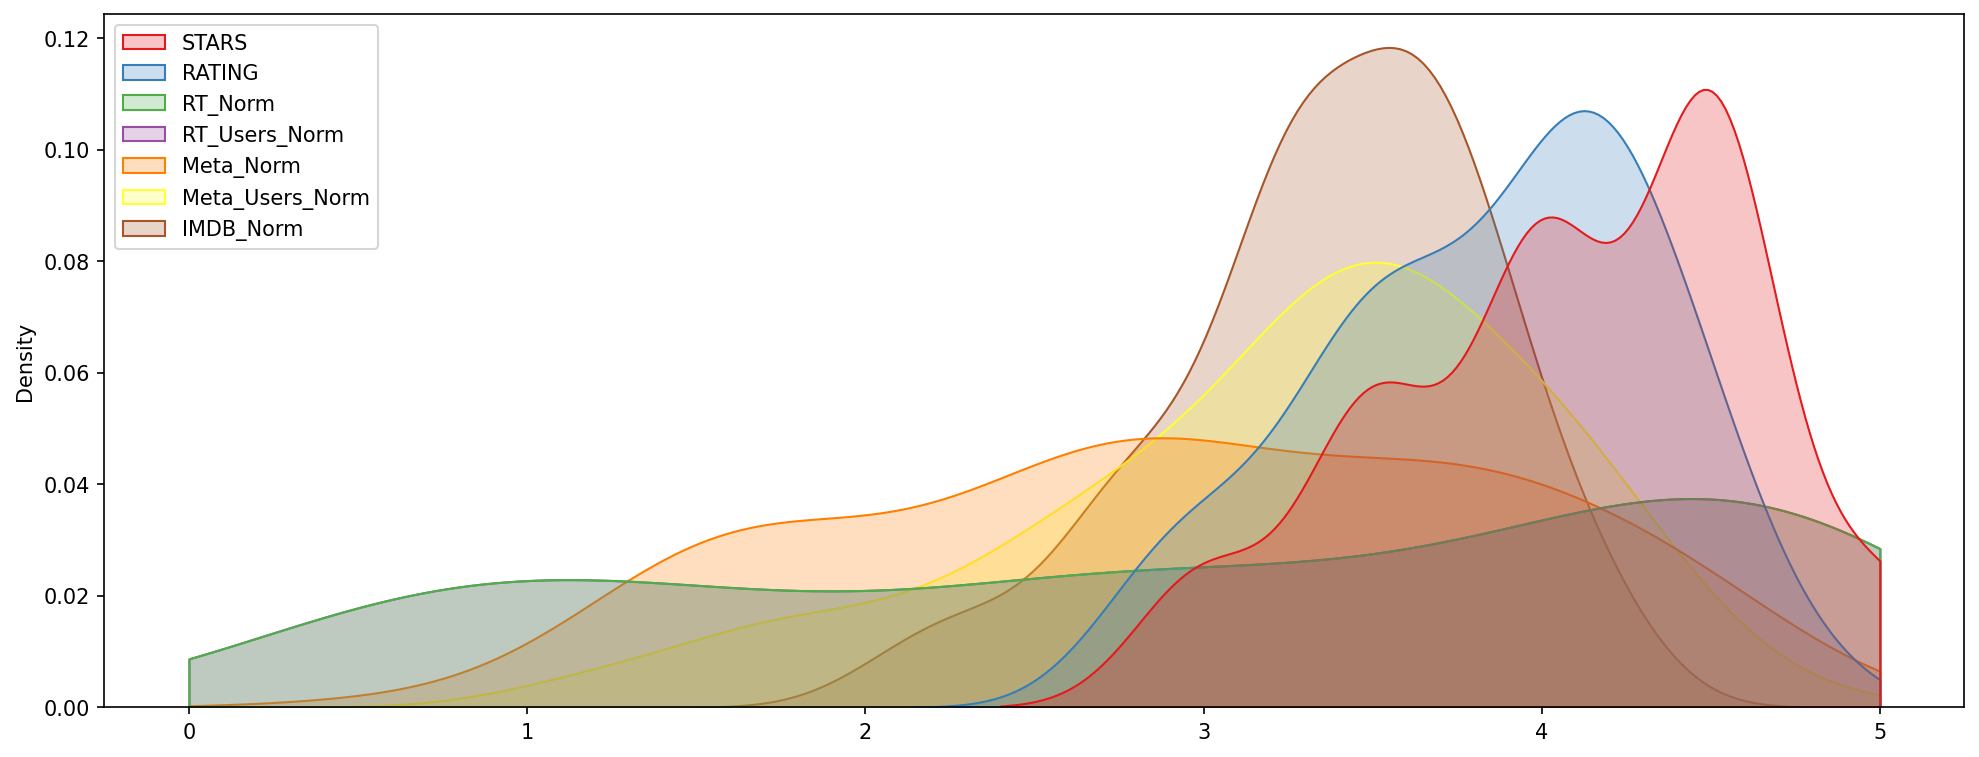

In [81]:
plt.figure(figsize=(16,6), dpi=150)
sns.kdeplot(data=norms_scores, fill=True, clip=[0,5], palette='Set1')

<Axes: ylabel='Density'>

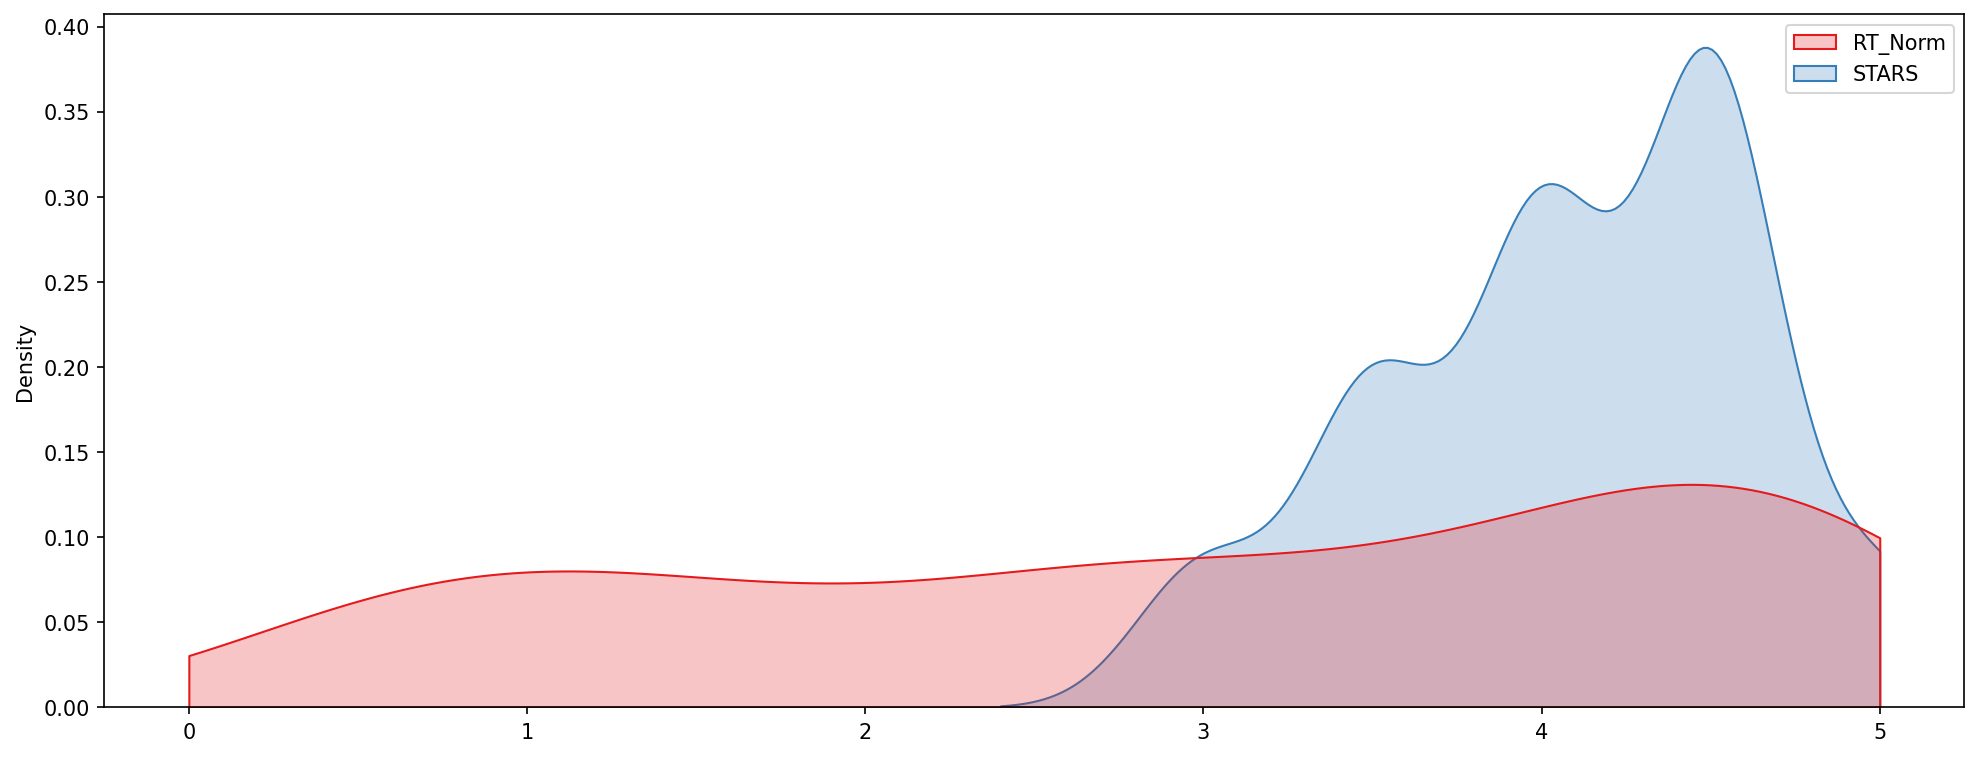

In [83]:
plt.figure(figsize=(16,6), dpi=150)
sns.kdeplot(data=norms_scores[['RT_Norm','STARS']], fill=True, clip=[0,5], palette='Set1')

<Axes: ylabel='Count'>

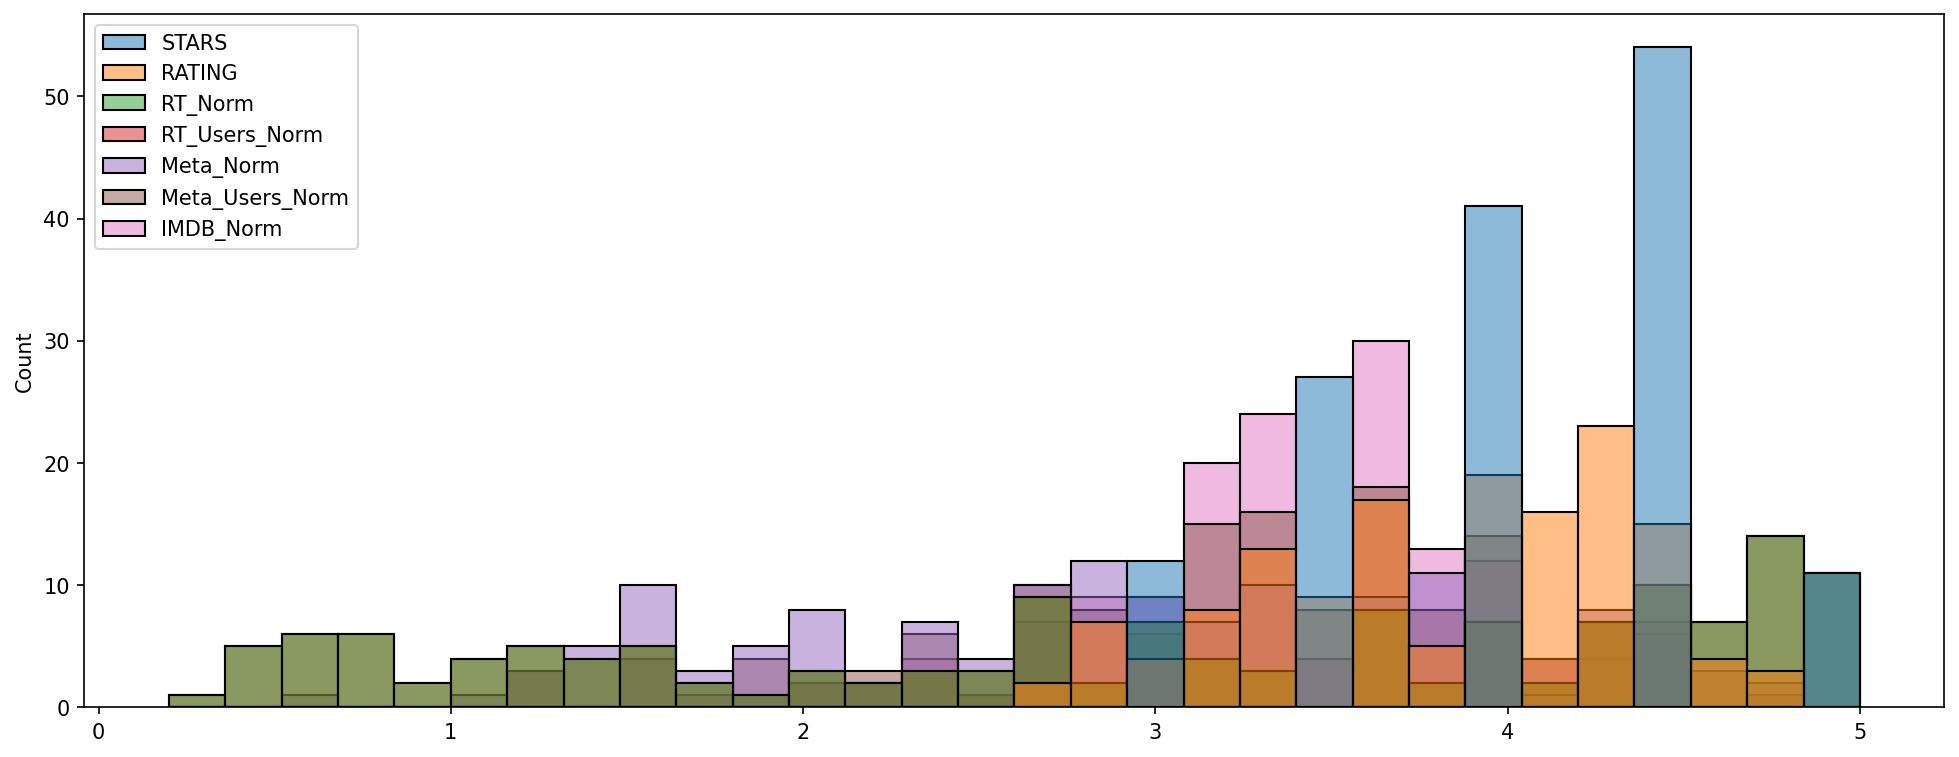

In [84]:
plt.figure(figsize=(16,6), dpi=150)
sns.histplot(norms_scores, bins=30)

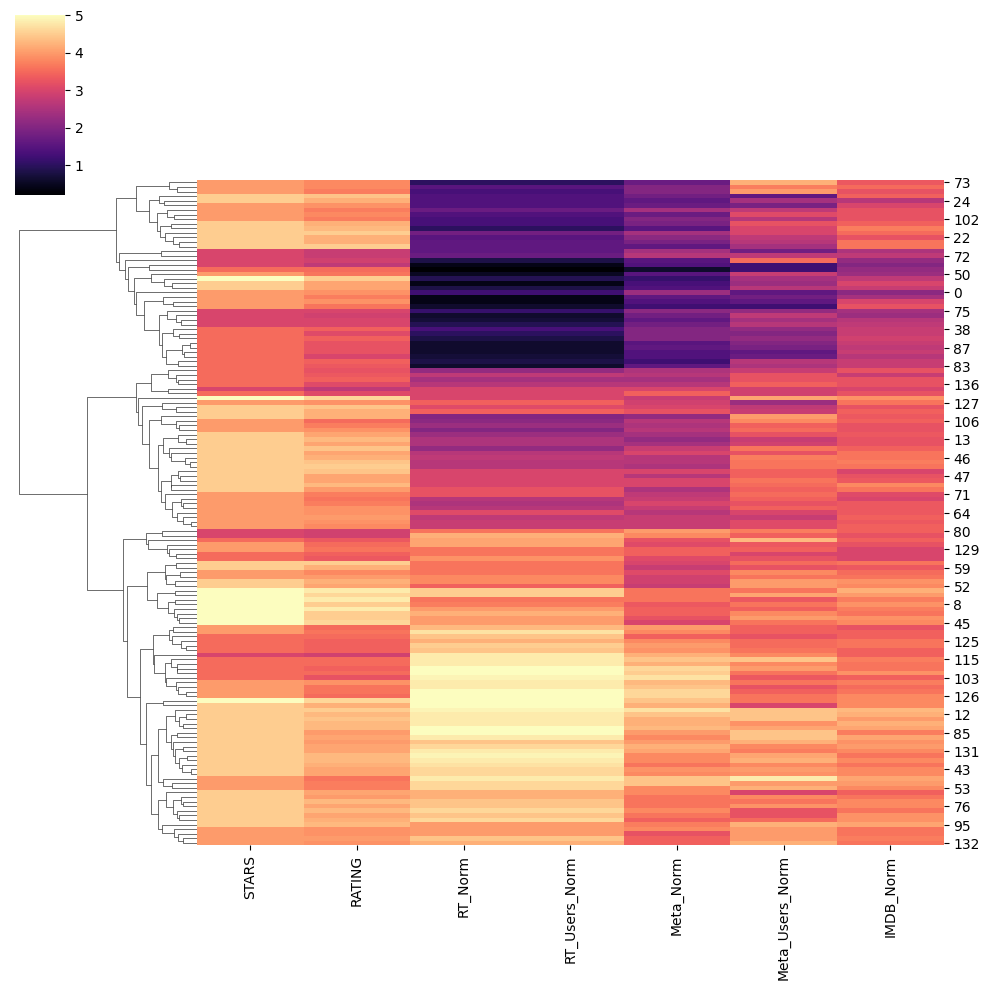

In [86]:
sns.clustermap(norms_scores,cmap='magma', col_cluster=False)

In [87]:
norms_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RT_Users_Norm', 'Meta_Norm',
       'Meta_Users_Norm', 'IMDB_Norm'],
      dtype='object')

In [89]:
norm_films=df[['FILM','STARS', 'RATING', 'RT_Norm', 'RT_Users_Norm', 'Meta_Norm',
       'Meta_Users_Norm', 'IMDB_Norm']]

In [92]:
worst_films=norm_films.nsmallest(10,'RT_Norm')

<Axes: ylabel='Density'>

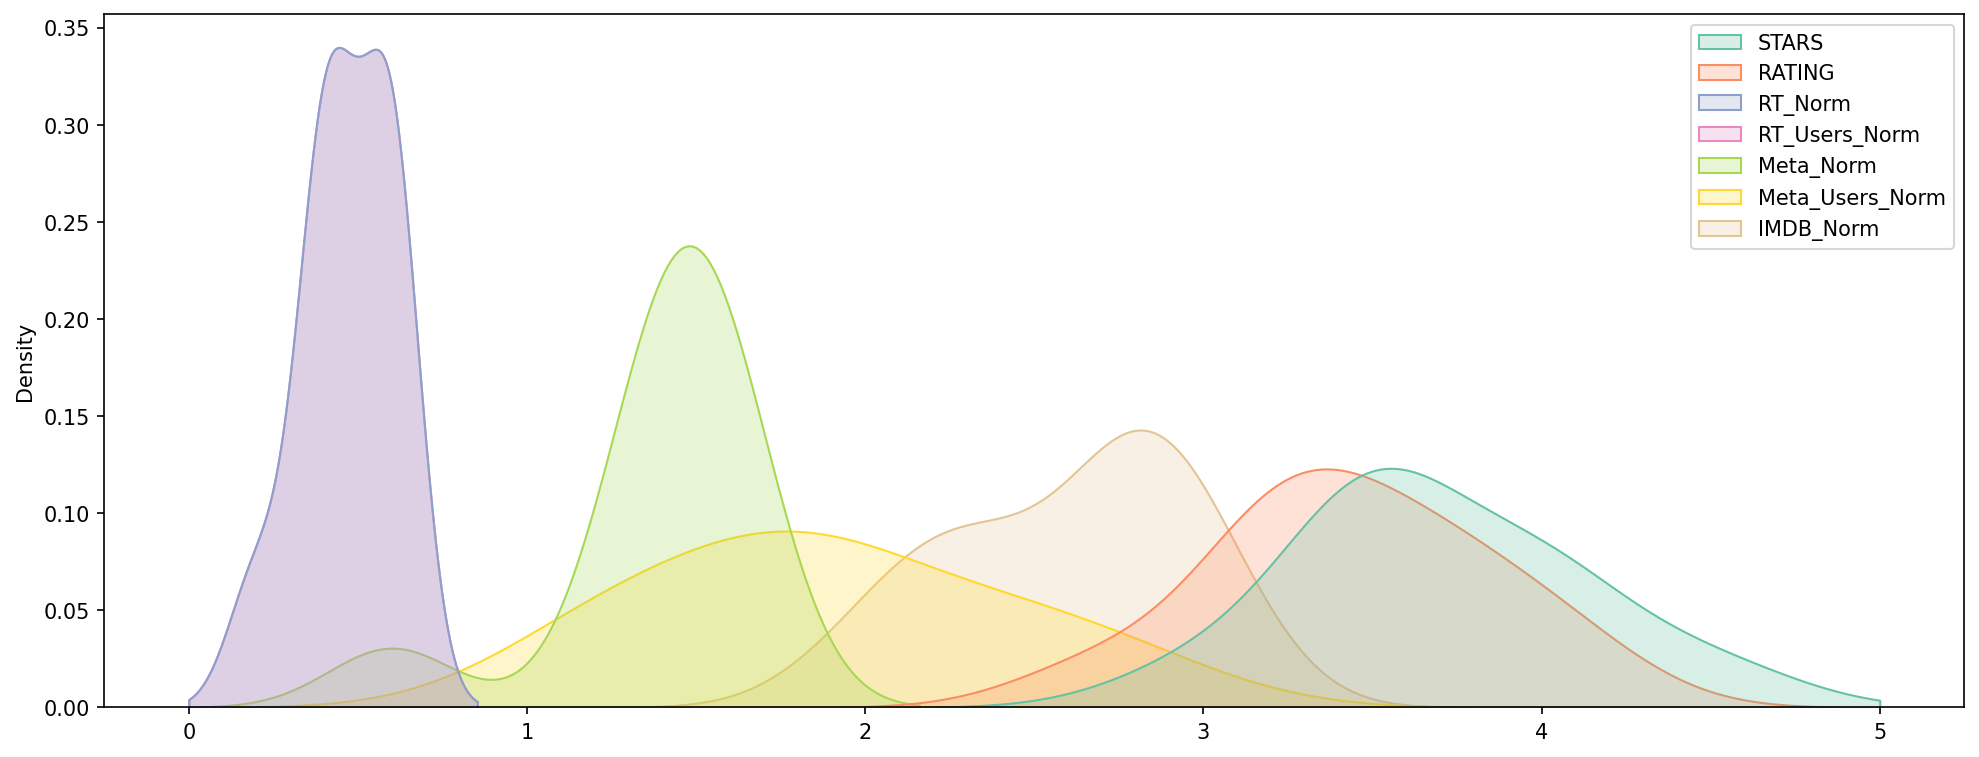

In [95]:
plt.figure(figsize=(16,6),dpi=150)
sns.kdeplot(data=worst_films, clip=[0,5], palette='Set2', fill=True)